### Project Goals
- Attempt to identify the relationship between gross domestic product (GDP) & life expectancy

### Analysis
- Analyze, Prepare, and Plot Data

In [4]:
# import the appropriate modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# For this analysis, we will import the supplied data, explore & clean the dataset, prepare the data for plotting, and plot the data in an appropriate manner (including summary statistics).

# import data
gdp_life_expectancy = pd.read_csv('all_data.csv')

# explore dataset
# print(gdp_life_expectancy.describe(include= 'all'))
# print(gdp_life_expectancy.info())
# gdp_life_expectancy.head()

# prepare data

# format data to appropriate type and column names
gdp_life_expectancy['country'] = gdp_life_expectancy['Country'].astype(str)
gdp_life_expectancy['year'] = gdp_life_expectancy['Year'].astype(str).astype('datetime64')
gdp_life_expectancy['gdpb'] = gdp_life_expectancy['GDP'].apply(lambda x: f"${x/1000000000:,.1f}")
gdp_life_expectancy['life'] = gdp_life_expectancy['Life expectancy at birth (years)']
gdp_life_expectancy.drop(columns= ['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], inplace= True)
gdp_life_expectancy.head()

,country,year,gdpb,life
0,Chile,2000-01-01,$77.9,77.3
1,Chile,2001-01-01,$71.0,77.3
2,Chile,2002-01-01,$69.7,77.8
3,Chile,2003-01-01,$75.6,77.9
4,Chile,2004-01-01,$99.2,78.0


ConversionError: Failed to convert value(s) to axis units: ['$123.0', '$99.2', 1]

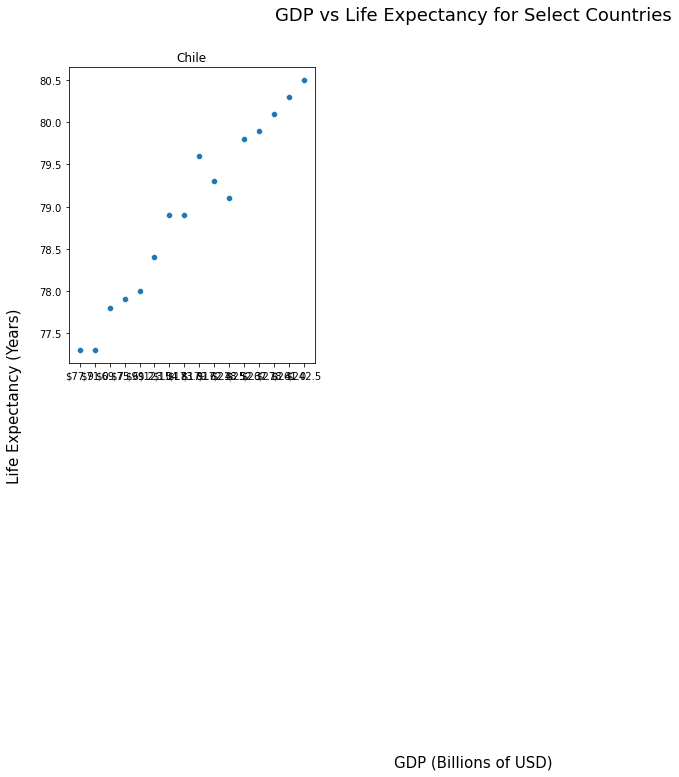

In [116]:
# plot data
countries = gdp_life_expectancy.country.unique()

fig = plt.figure(figsize=(15, 12))
# plt.subplots_adjust(hspace=0.5)
plt.suptitle("GDP vs Life Expectancy for Select Countries", fontsize=18, y=0.95)
fig.text(0.075,0.5, 'Life Expectancy (Years)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.5,0.075, 'GDP (Billions of USD)', ha="center", va="center", fontsize=15)

# loop through the length of countries and keep track of index
for n, country in enumerate(countries):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n + 1)

    # filter df and plot country on the new subplot axis
    gdpb = gdp_life_expectancy['gdpb'][gdp_life_expectancy['country'] == country]
    life = gdp_life_expectancy['life'][gdp_life_expectancy['country'] == country]
    min_coun_gdpb = np.min(gdpb) 
    max_coun_gdpb = np.max(gdpb)
    min_coun_life = np.min(life)
    max_coun_life = np.max(life)
    
    sns.scatterplot(x= gdpb, y= life, ax=ax)

    # chart formatting
    ax.set_title(country.title())
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([min_coun_gdpb, max_coun_gdpb, 1])
    ax.set_yticks([min_coun_life, max_coun_life])
    ax.set_xticklabels(ax.get_xticks(), rotation = -45)


### Evaluation
- Create Blog